### Dataset is class_marks.csv, a custom dataset.
The dataset contains **question-wise marks** for students from a class in a structured exam format.
It comprises **86 rows** and **12 columns**, representing the **total marks** obtained and **scores for individual sub-questions**.

Each entry corresponds to a student and includes marks for multiple parts of questions, such as
- Q1a (Max 4), Q1b (Max 6)
- Q2a (Max 6), Q2b (Max 4)
- Q3a (Max 5), Q3b (Max 5)
- Q4a (Max 3), Q4b (Max 7)
- Q5 (Max 10)
- Q6a (Max 4), Q6b (Max 6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('class_marks.csv')
print(df.head())

   Total  Q1aM4  Q1bM6  Q2aM6  Q2bM4  Q3aM5  Q3bM5  Q4aM3  Q4bM7  Q5M10  \
0     37    4.0    5.0    6.0    4.0    2.0    1.0    NaN    5.0    8.0   
1     32    4.0    3.0    4.0    3.0    NaN    NaN    3.0    6.0    9.0   
2     33    4.0    5.0    5.0    1.0    5.0    5.0    NaN    NaN    8.0   
3     24    4.0    6.0    6.0    3.0    2.0    2.0    NaN    NaN    NaN   
4     36    3.0    6.0    4.0    4.0    5.0    4.0    NaN    NaN   10.0   

   Q6aM4  Q6bM6  
0    4.0    6.0  
1    NaN    NaN  
2    NaN    NaN  
3    2.0    NaN  
4    NaN    NaN  


#### Importing the necessary libraries, and load the dataset.The class_marks.csv dataset contains scores for various questions (e.g., Q1aM4, Q1bM6) and their total scores of student.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   86 non-null     int64  
 1   Q1aM4   85 non-null     float64
 2   Q1bM6   73 non-null     float64
 3   Q2aM6   72 non-null     float64
 4   Q2bM4   75 non-null     float64
 5   Q3aM5   52 non-null     float64
 6   Q3bM5   51 non-null     float64
 7   Q4aM3   32 non-null     float64
 8   Q4bM7   26 non-null     float64
 9   Q5M10   56 non-null     float64
 10  Q6aM4   33 non-null     float64
 11  Q6bM6   28 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 8.2 KB
None


#### The dataset contains 86 entries, with 11 columns representing individual question scores. The "Total" column aggregates the maximum scores of 4 selected questions for each student. and dataset contains some NaN values in it.

#### Individual scores are recorded in float64 format.

#### Total score is the sum of the highest 4 scores. recorded in int64 format.



In [4]:
df.columns.tolist()

['Total',
 'Q1aM4',
 'Q1bM6',
 'Q2aM6',
 'Q2bM4',
 'Q3aM5',
 'Q3bM5',
 'Q4aM3',
 'Q4bM7',
 'Q5M10',
 'Q6aM4',
 'Q6bM6']

#### Displaying the columns in the dataset by converting it into list

In [5]:
df.shape

(86, 12)

### The shape of the dataset is 86 rows and  12 columns

In [6]:
df.nunique()

Total    27
Q1aM4     5
Q1bM6     5
Q2aM6     6
Q2bM4     4
Q3aM5     5
Q3bM5     5
Q4aM3     3
Q4bM7     6
Q5M10     7
Q6aM4     4
Q6bM6     6
dtype: int64

### nunique returns the unique values there are in each column of dataset.

Missing Values: 
Total     0
Q1aM4     1
Q1bM6    13
Q2aM6    14
Q2bM4    11
Q3aM5    34
Q3bM5    35
Q4aM3    54
Q4bM7    60
Q5M10    30
Q6aM4    53
Q6bM6    58
dtype: int64


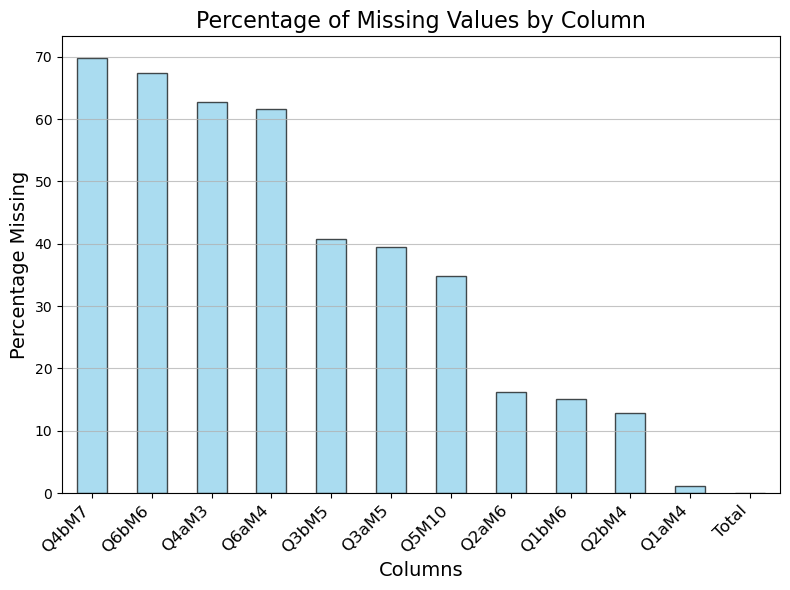

In [7]:
null_values = df.isnull().sum()

null_value_percentage = (null_values/ len(df)) * 100

print("Missing Values: ")
print(null_values)

null_values_df = pd.DataFrame({
    'Missing Values': null_values,
    'Percentage Missing': null_value_percentage
}).sort_values(by='Percentage Missing', ascending=False)

null_values_df

plt.figure(figsize=(8,6))
null_values_df['Percentage Missing'].plot(
    kind='bar', color='skyblue', edgecolor='black', alpha=0.7
)
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage Missing', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

#### Above displays the count and percentage of NaN values in individual columns of the dataset and sorted in decending order.

#### NaN value represents that the question is not attempted.

#### Q1aM4 has missing value of 1 and missing percentage of 1.162 indicating 99% out of 100% students attempted the question.

#### Q4bM7, Q6bM6, Q4aM3 and Q6aM4 have the high missing value percentage indicating 40% out of 100% student attempted the questions.

#### The kernel visualizes the percentage of missing  values by column using a bar chart

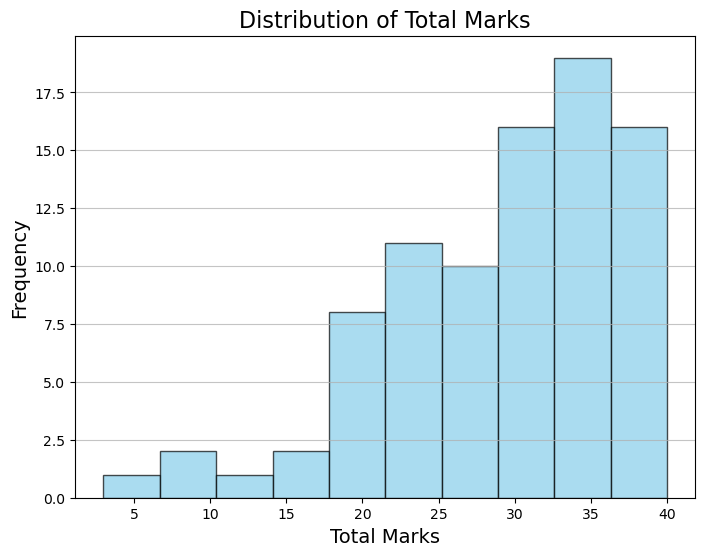

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(df['Total'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Marks', fontsize=16)
plt.xlabel('Total Marks', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### The Kernel visualize the distribution of total marks using bar chart

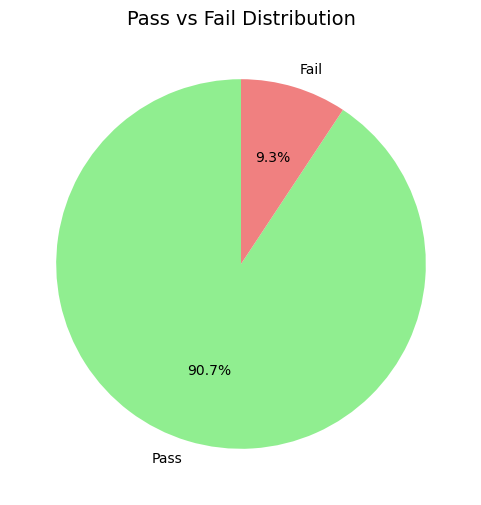

In [9]:
pass_marks=20

df['Result'] = df['Total'].apply(
    lambda x: 'Pass' if x >= pass_marks else 'Fail'
)

result_counts = df['Result'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    result_counts,
    labels=result_counts.index,
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    startangle=90
)
plt.title('Pass vs Fail Distribution', fontsize=14)
plt.show()

#### Calculating the pass percentage based on a threshold value of 20 marks and Result is added as new column to the dataset. 

#### Visualizing the distribution of pass and fail marks using pie chart.

In [10]:
df['Q1']=df['Q1aM4']+df['Q1bM6']
df['Q2']=df['Q2aM6']+df['Q2bM4']
df['Q3']=df['Q3aM5']+df['Q3bM5']
df['Q4']=df['Q4aM3']+df['Q4bM7']
df['Q5']=df['Q5M10']
df['Q6']=df['Q6aM4']+df['Q6bM6']
df.drop(['Q1aM4', 'Q1bM6','Q2aM6','Q2bM4','Q3aM5','Q3bM5','Q4aM3','Q4bM7','Q5M10','Q6aM4','Q6bM6'], axis=1,inplace=True)
print("Transformed Data: ")
df.info()

Transformed Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   86 non-null     int64  
 1   Result  86 non-null     object 
 2   Q1      73 non-null     float64
 3   Q2      70 non-null     float64
 4   Q3      47 non-null     float64
 5   Q4      22 non-null     float64
 6   Q5      56 non-null     float64
 7   Q6      26 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.5+ KB


### Performed Data transfromation on the dataset by eliminating the unncessary columns and reducing the complexity of the dataset by adding new columns such as Q1,Q2 and others in dataset. Dropping the outdated columns.

In [11]:
 df.fillna(0,inplace=True)
convert_dtype={
'Total':int, 'Q1':int, 'Q2':int, 'Q3':int, 'Q4':int, 'Q5':int, 'Q6':int
}
df=df.astype(convert_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Total   86 non-null     int32 
 1   Result  86 non-null     object
 2   Q1      86 non-null     int32 
 3   Q2      86 non-null     int32 
 4   Q3      86 non-null     int32 
 5   Q4      86 non-null     int32 
 6   Q5      86 non-null     int32 
 7   Q6      86 non-null     int32 
dtypes: int32(7), object(1)
memory usage: 3.2+ KB


### Changing the datatype from float64 to int64 using astype function and replacing the null values with 0

Average marks: 
Q1    6.930233
Q2    7.000000
Q3    4.639535
Q4    1.941860
Q5    5.209302
Q6    2.651163
dtype: float64


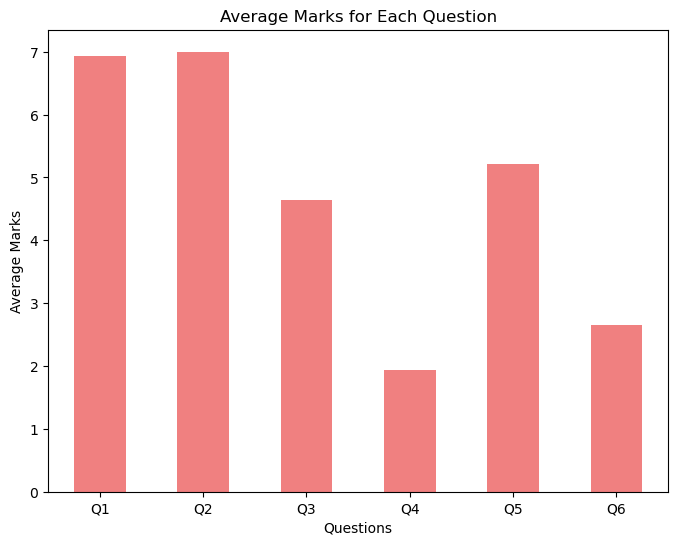

In [12]:
column_averages = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].mean()

print("Average marks: ")
print(column_averages)
plt.figure(figsize=(8, 6))
column_averages.plot(kind='bar', color='lightcoral')
plt.xlabel('Questions')
plt.ylabel('Average Marks')
plt.title('Average Marks for Each Question')
plt.xticks(rotation=0)
plt.show()


### The kernel visualize the average marks for each question using the bar chart.

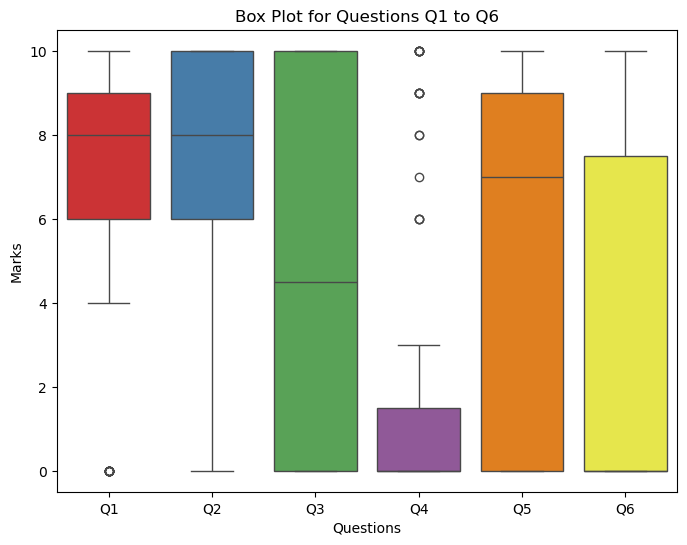

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']], palette='Set1')
plt.title('Box Plot for Questions Q1 to Q6')
plt.ylabel('Marks')
plt.xlabel('Questions')
plt.show()

### Kernel visualizes the dataset using the box plot. It is mainly used for identifying outliers in dataset represented as single data point.

### Outliers appear in Q1 and Q4, this might indicate that a few students had an exceptionally low or high performance on that question compared to the rest.
### Q4 has more outliers when compared with Q1. Since the null values are high in Q4. 

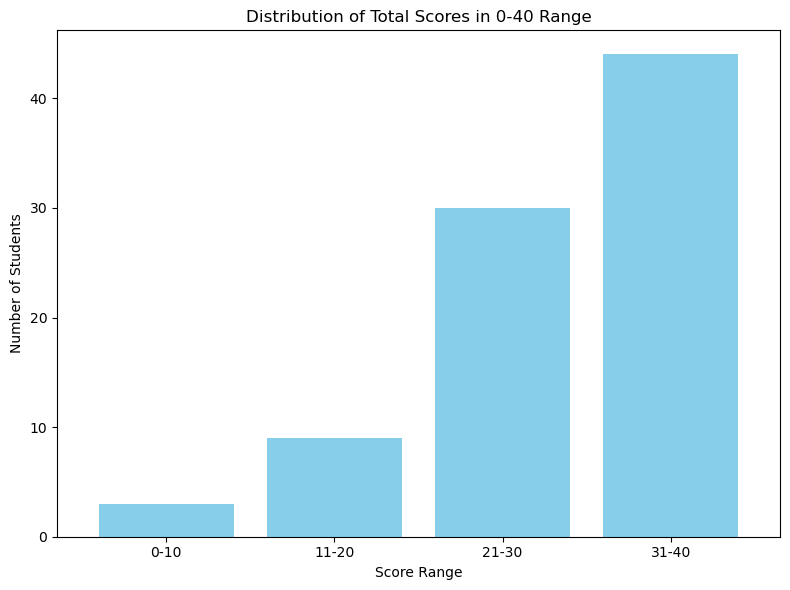

In [14]:
bins = [0, 10, 20, 30, 40]
labels = ['0-10', '11-20', '21-30', '31-40']

df['Score_Range'] = pd.cut(df['Total'], bins=bins, labels=labels)
score_range=df['Score_Range'].value_counts().sort_index()
score_range.plot(kind='bar', figsize=(8, 6), width=0.8, color='skyblue')
plt.title('Distribution of Total Scores in 0-40 Range')
plt.xlabel('Score Range')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### The count of students in different score ranges based on Total scores. The bins used for categorizing the scores were [0, 10, 20, 30, 40], and the distribution was visualized using a bar graph.

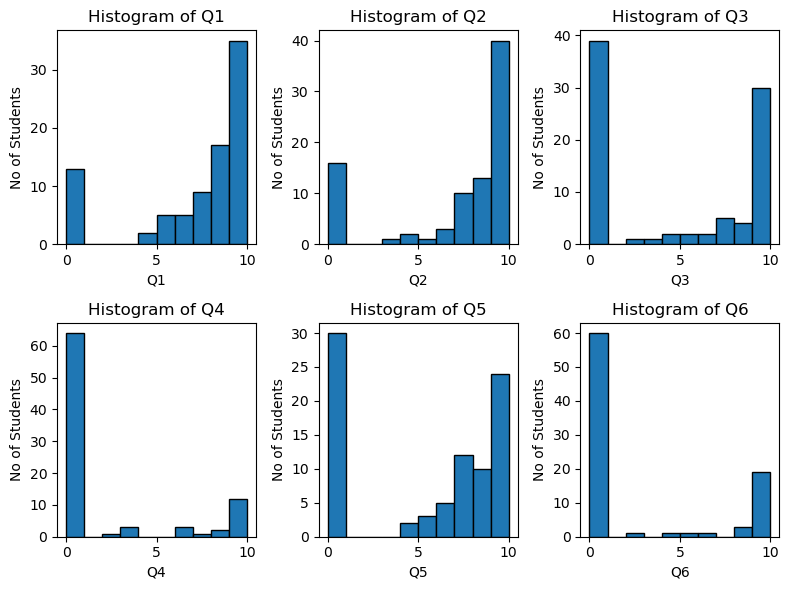

In [15]:
columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

plt.figure(figsize=(8,6))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  
    plt.hist(df[col], bins=10, edgecolor='black')  
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('No of Students')

plt.tight_layout()
plt.show()

### Above is the basic histogram graph for each column

In [16]:
def GradeMarks(df):
    if(df.Total >=35 and df.Total<=40):
        return 'A'
    elif (df.Total>=30 and df.Total<35):
        return 'B'
    elif (df.Total>=25 and df.Total<30):
        return 'C'
    elif (df.Total>=19 and df.Total<25):
        return 'D'
    else:
        return 'F'

In [17]:
df['Grade']=df.apply(GradeMarks, axis = 1)

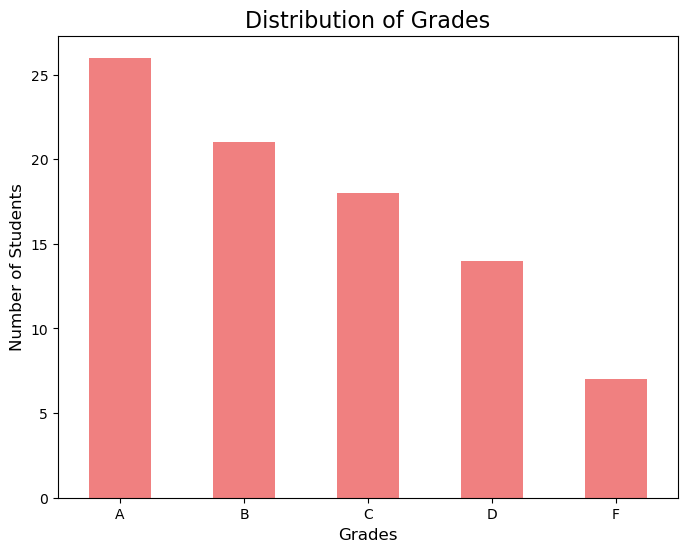

In [18]:
grade_counts = df['Grade'].value_counts()
plt.figure(figsize=(8,6))
grade_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Grades', fontsize=16)
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)
plt.show()

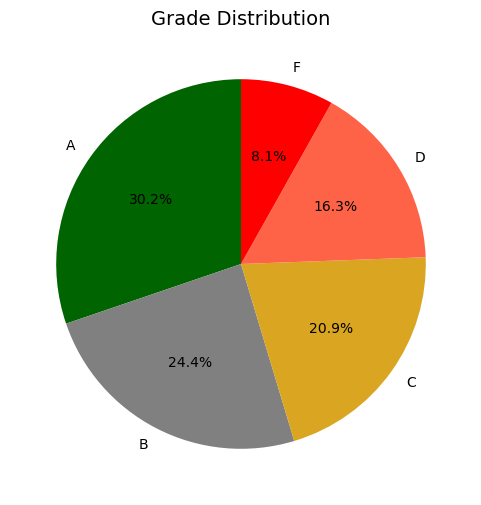

In [19]:
plt.figure(figsize=(6, 6))
plt.pie(
   grade_counts,
    labels=grade_counts.index,
    autopct='%1.1f%%',
    colors=[ 'darkgreen','grey','goldenrod','tomato','red'],
    startangle=90
)
plt.title('Grade Distribution', fontsize=14)
plt.show()

In [20]:
df["Marks"]=df['Q1']+ df['Q2']+df['Q3']+df['Q4']+df['Q5']+df['Q6']

In [21]:
df['Extra Marks']=df.Marks-df.Total

In [22]:
df[['Marks','Total','Extra Marks']]

Marks  Total  Extra Marks
0      40     37            3
1      32     32            0
2      33     33            0
3      23     24           -1
4      36     36            0
..    ...    ...          ...
81     34     32            2
82     27     27            0
83     37     37            0
84     24     28           -4
85     30     29            1

[86 rows x 3 columns]

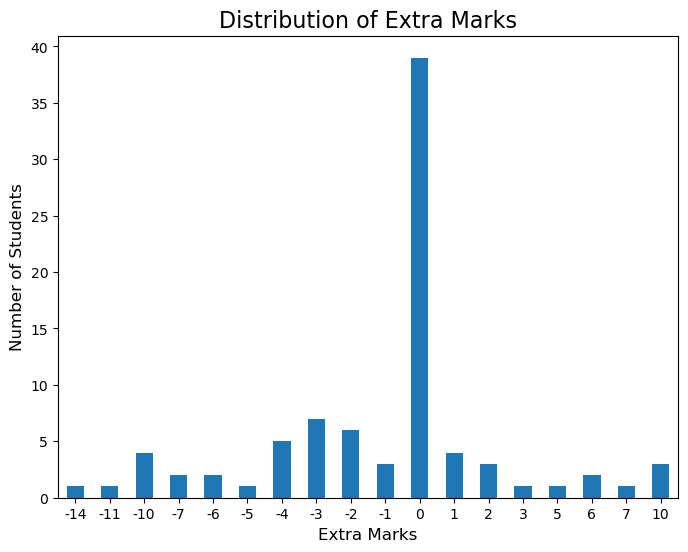

In [23]:
grade_counts = df['Extra Marks'].value_counts().sort_index()
plt.figure(figsize=(8,6))
grade_counts.plot(kind='bar')
plt.title('Distribution of Extra Marks', fontsize=16)
plt.xlabel('Extra Marks', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [24]:
df2=df[df["Extra Marks"]>0]
df2

Total Result  Q1  Q2  Q3  Q4  Q5  Q6 Score_Range Grade  Marks  Extra Marks
0      37   Pass   9  10   3   0   8  10       31-40     A     40            3
12     34   Pass   8   8   4   3   9   4       31-40     B     36            2
13     32   Pass   6  10   8   0   9   0       31-40     B     33            1
15     32   Pass   0   3  10  10   0  10       31-40     B     33            1
22     14   Fail   8   7   0   0   0   0       11-20     F     15            1
24     33   Pass   7   9  10   6   7   0       31-40     B     39            6
36     37   Pass   0  10  10   0  10   9       31-40     A     39            2
47     38   Pass   8  10  10  10  10   0       31-40     A     48           10
50     24   Pass   9   0  10   0   5  10       21-30     D     34           10
54     21   Pass   8   0  10   0   0  10       21-30     D     28            7
59     38   Pass   8  10  10   0  10  10       31-40     A     48           10
61     24   Pass   9  10   0   0   0  10       21-30     D     29            5
66     31   Pass   9   7   8   6   7   0       31-40     B     37            6
81     32   Pass   9   7   8   0   0  10       31-40     B     34            2
85     29   Pass  10   0   0   8   7   5       21-30     C     30            1

In [25]:
question_cols = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]
df["Calculated Total"] = df[question_cols].apply(lambda row: sum(sorted(row, reverse=True)[:4]), axis=1)
print(df["Calculated Total"])
df

0     37
1     32
2     33
3     23
4     36
      ..
81    34
82    27
83    37
84    24
85    30
Name: Calculated Total, Length: 86, dtype: int64


Total Result  Q1  Q2  Q3  Q4  Q5  Q6 Score_Range Grade  Marks  \
0      37   Pass   9  10   3   0   8  10       31-40     A     40   
1      32   Pass   7   7   0   9   9   0       31-40     B     32   
2      33   Pass   9   6  10   0   8   0       31-40     B     33   
3      24   Pass  10   9   4   0   0   0       21-30     D     23   
4      36   Pass   9   8   9   0  10   0       31-40     A     36   
..    ...    ...  ..  ..  ..  ..  ..  ..         ...   ...    ...   
81     32   Pass   9   7   8   0   0  10       31-40     B     34   
82     27   Pass   4   8   0   0   7   8       21-30     C     27   
83     37   Pass  10   8   0   0   9  10       31-40     A     37   
84     28   Pass   0   9   9   0   6   0       21-30     C     24   
85     29   Pass  10   0   0   8   7   5       21-30     C     30   

    Extra Marks  Calculated Total  
0             3                37  
1             0                32  
2             0                33  
3            -1                23  
4             0                36  
..          ...               ...  
81            2                34  
82            0                27  
83            0                37  
84           -4                24  
85            1                30  

[86 rows x 13 columns]

In [26]:
def extra_marks_contribution(row):
    top_4 = sorted(row[question_cols], reverse=True)[:4]
    remaining = [q for q in row[question_cols] if q not in top_4][:2]
    contribution = {f"Q{i+1}": row[f"Q{i+1}"] in remaining for i in range(6)}
    return contribution

df["Extra Marks Contribution"] = df.apply(extra_marks_contribution, axis=1)

contribution_counts = df["Extra Marks Contribution"].apply(pd.Series).sum()

print("Extra Marks Contribution by Question:")
print(contribution_counts)

Extra Marks Contribution by Question:
Q1     5
Q2     5
Q3    14
Q4    32
Q5     7
Q6    28
dtype: int64


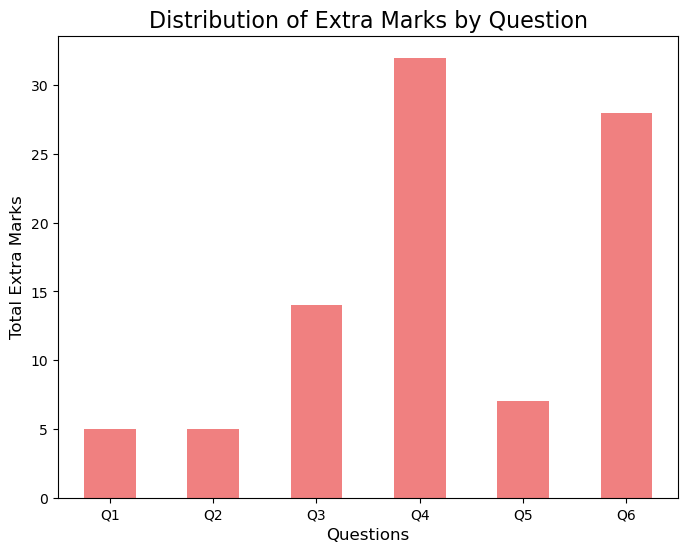

In [27]:
plt.figure(figsize=(8, 6))
contribution_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Extra Marks by Question', fontsize=16)
plt.xlabel('Questions', fontsize=12)
plt.ylabel('Total Extra Marks', fontsize=12)
plt.xticks(rotation=0)
plt.show()

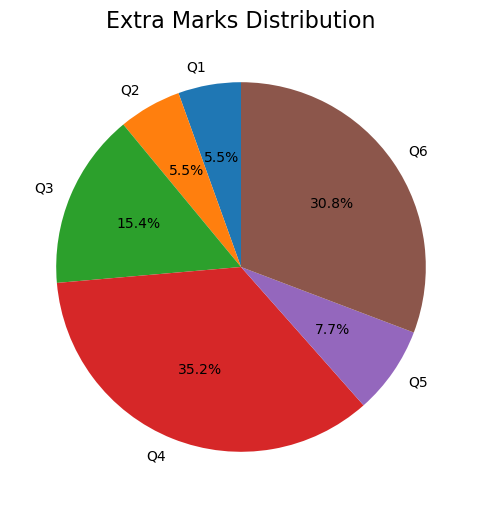

In [28]:
plt.figure(figsize=(6, 6))
plt.pie(
   contribution_counts,
    labels=contribution_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Extra Marks Distribution', fontsize=16)
plt.show()